### Library ###

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re
from nltk.tokenize import word_tokenize

#Training
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

vectorizer = TfidfVectorizer()

#Model
from sklearn.ensemble import GradientBoostingClassifier
import joblib #for saving & load model

#Metric
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

#get text from URL
from newspaper import Article

nlp = spacy.load('en_core_web_sm')
lemma = WordNetLemmatizer()

### Load Dataset ###

In [3]:
dataset_true1 = "dataset/drive-download-20250228T073821Z-001/bhavik_jikadara/true.csv"
dataset_fake1 = "dataset/drive-download-20250228T073821Z-001/bhavik_jikadara/fake.csv"

dataset_true2 = "dataset/drive-download-20250228T073821Z-001/clmentbisaillon/True.csv"
dataset_fake2 = "dataset/drive-download-20250228T073821Z-001/clmentbisaillon/Fake.csv"

# dataset format has been combined
# dataset_combined3 = "dataset/drive-download-20250228T073821Z-001/COVID-19 Fake News Dataset-abhishek koirala/COVID-19 Fake News Dataset/fake_new_dataset1.csv"


dataset_true3 = "dataset/drive-download-20250228T073821Z-001/fakenews_by_jair_ribeiro/True.csv"
dataset_fake3 = "dataset/drive-download-20250228T073821Z-001/fakenews_by_jair_ribeiro/Fake.csv"

#perlu di pre process karena ada label berlebih
dataset_combined4 = "dataset/drive-download-20250228T073821Z-001/dataset4.csv" 


# dataset format has been combined
dataset_combined5 = "dataset/drive-download-20250228T073821Z-001/saurabh_Shahane/WELFake_Dataset.csv"

dataset_true6 = "dataset/drive-download-20250228T073821Z-001/Shavik_jikadara/true.csv"
dataset_fake6 = "dataset/drive-download-20250228T073821Z-001/Shavik_jikadara/fake.csv"

dataset7_train = "dataset/drive-download-20250228T073821Z-001/AADYA_SINGH/train (2).csv"
dataset7_eval = "dataset/drive-download-20250228T073821Z-001/AADYA_SINGH/evaluation.csv"
dataset7_test = "dataset/drive-download-20250228T073821Z-001/AADYA_SINGH/test (1).csv"

In [4]:
def combine_dataset(datasetTrue, datasetFake):
    df1 = pd.read_csv(datasetTrue)
    df1['category'] = "1"
    df2 = pd.read_csv(datasetFake)
    df2['category'] = "0"
    df = pd.concat([df1, df2])
    df = df.reset_index()
    return df

In [5]:
dataset1 = combine_dataset(dataset_true1, dataset_fake1)
dataset2 = combine_dataset(dataset_true2, dataset_fake2)
dataset3 = combine_dataset(dataset_true3, dataset_fake3)
dataset4 = pd.read_csv(dataset_combined4)
dataset5 = pd.read_csv(dataset_combined5)
dataset6 = combine_dataset(dataset_true6, dataset_fake6)
dataset7train = pd.read_csv(dataset7_train, sep=';')
dataset7eval = pd.read_csv(dataset7_eval, sep=';')

#membuat space untuk menyimpan X dan Y untuk cross validation dengan array 2d
X = []
Y = []

### Pipeline ###

In [6]:
text_gb_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', GradientBoostingClassifier())])
text_gb_clf
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

### Load StopWord ###

In [7]:
#stopword
list1 = nlp.Defaults.stop_words
print(len(list1))
list2 = stopwords.words('english')
print(len(list2))

#combinig
Stopwords = set((set(list1) | set(list2)))
print(len(Stopwords))

326
179
382


### Text Cleaning Function ###

In [8]:
#text cleaning function
def clean_text(text):
    
    string = ""
    
    #lower casing
    text=text.lower()
    
    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    
    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)
    
    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "
    
    return string



### Splitting Data Function ###

In [9]:
def splitting(df):
    X = df['text'] #feature
    y = df['category'] #target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    return X_train, X_test, y_train, y_test
    

### Train Function ###

In [10]:
def trainDataset(X_train, y_train):
    model = text_gb_clf.fit(X_train, y_train)
    return model


### Get Text from URL Function ###

In [11]:
def extract_text_from_url(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        return article.text
    except Exception as e:
        return None


## dataset1 ##

In [12]:
dataset1.head()

,index,title,text,subject,date,category
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [13]:
#subjek apa saja yang ada di dalam dataset
dataset1['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

C:\Users\MSI\AppData\Local\Temp\ipykernel_20100\3937836708.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Fake News', 'True News'])


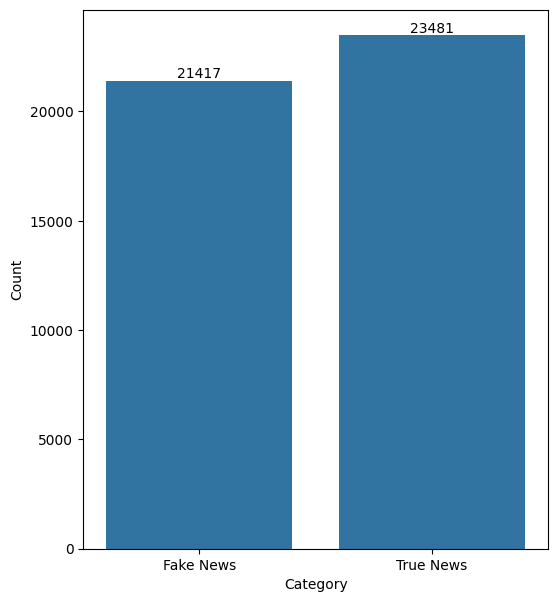

In [14]:
# jumlah label true & fake
plt.figure(figsize=(6, 7))
ax = sns.countplot(x='category', data=dataset1)
plt.xlabel('Category')  # Label sumbu x
plt.ylabel('Count')     # Label sumbu y

# Mengganti label sumbu x
ax.set_xticklabels(['Fake News', 'True News'])

# Menambahkan teks jumlah data di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

In [15]:
dataset1.isna().sum() #check null

index       0
title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [16]:
#check jika ada empty string
blank = []

for index, text in dataset1["text"].items():
    if text.isspace(): # jika string kosong
        blank.append(index) # simpan index

len(blank)
blank

[8970,
 32340,
 32458,
 32607,
 32642,
 32653,
 32658,
 32664,
 32666,
 32684,
 32685,
 32700,
 32701,
 32702,
 32706,
 32707,
 32709,
 32712,
 32713,
 32718,
 32720,
 32721,
 32722,
 32726,
 32731,
 32734,
 32736,
 32739,
 32747,
 32751,
 32752,
 32757,
 32760,
 32765,
 32768,
 32769,
 32774,
 32788,
 32790,
 32791,
 32799,
 32814,
 32819,
 32820,
 32826,
 32827,
 32829,
 32832,
 32836,
 32838,
 32844,
 32848,
 32849,
 32857,
 32865,
 32867,
 32870,
 32879,
 32881,
 32882,
 32889,
 32890,
 32892,
 32895,
 32906,
 32908,
 32910,
 32911,
 32918,
 32922,
 32924,
 32937,
 32948,
 32949,
 32950,
 32955,
 32959,
 32964,
 32966,
 32968,
 32976,
 32980,
 32998,
 33002,
 33006,
 33007,
 33031,
 33041,
 33042,
 33044,
 33048,
 33053,
 33054,
 33060,
 33067,
 33075,
 33078,
 33089,
 33096,
 33098,
 33101,
 33103,
 33105,
 33109,
 33125,
 33135,
 33146,
 33156,
 33170,
 33182,
 33185,
 33194,
 33199,
 33203,
 33205,
 33209,
 33210,
 33220,
 33223,
 33230,
 33238,
 33248,
 33249,
 33258,
 33261,
 

### Pre-Processing ###

In [17]:
# 1. menghapus fitur yang tidak perlu
dataset1 = dataset1[['text', 'category']]
dataset1['category'] = dataset1['category'].replace({0: '0', 1: '1'})
dataset1.head()

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [18]:
# 2. menghapus kolom yang kosong
# cek jumlah kolom sebelum di hapus
print("sebelum : ")
print(dataset1.shape)
# menghapus kolom yang kosong
dataset1.drop(blank, inplace=True)
print()
# cek setalah di hapus
print("sesudah : ")
print(dataset1.shape)

sebelum : 
(44898, 2)

sesudah : 
(44267, 2)


In [19]:
dataset1['text'] = dataset1['text'].apply(clean_text)

In [20]:
dataset1

,text,category
0,washington reuters head conservative republica...,1
1,washington reuters transgender people allowed ...,1
2,washington reuters special counsel investigati...,1
3,washington reuters trump campaign adviser geor...,1
4,seattle washington reuters president donald tr...,1
...,...,...
44893,21st century wire say 21wire reported earlier ...,0
44894,21st century wire say familiar theme dispute c...,0
44895,patrick henningsen 21st century wireremember o...,0
44896,21st century wire say al jazeera america histo...,0


### Train ###

In [21]:
X_train, X_test, y_train, y_test = splitting(dataset1)

X_train1, X_test1, y_train1, y_test1 = splitting(dataset1)

In [22]:
# Memasukkan data kedalam list agar mudah melakukan cross validation
X.append([X_train, X_test])
Y.append([y_train, y_test])


In [23]:
# model1 = trainDataset(X_train, y_train)
# joblib.dump(model1, 'model_dataset1.pkl')

# load model
model1 = joblib.load('model_dataset1.pkl')

In [35]:
print(X_test.iloc[0])

act violence vandalism committed american voiced support trump voter staying silent plan vote mean massive number voter turning trump come sending absentee ballot showing poll november 8th let medium discourage getting vote trump believe poll trump rally pretty good indication strong momentum presidency trump 2 4 rally day america hillary fundraising resting rally hillary actually think drawing massive crowd truth matter barely fill high school gym people passionate president listen governor mike huckabee silent majority trump voter http twitter com wesleyrickard status 790329136115949570 


### Predict ###

In [ ]:
predictions = model1.predict(X_test)
print(predictions)
prediction_proba = model1.predict_proba([X_test.iloc[0]])
max_proba = np.max(prediction_proba)
print("Probabilitas tertinggi:", max_proba)

['0' '0' '0' ... '0' '1' '1']
Probabilitas tertinggi: 0.9955656833960175


In [25]:
pred = model1.predict(X[0][1])

### Evaluasi ###

In [ ]:
# Step 5: Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[6777   53]
 [  17 6434]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6830
           1       0.99      1.00      0.99      6451

    accuracy                           0.99     13281
   macro avg       0.99      0.99      0.99     13281
weighted avg       0.99      0.99      0.99     13281



In [ ]:
print(metrics.accuracy_score(y_test, predictions)*100,"%")

99.47293125517656 %


In [ ]:
# text = "Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images."
text = "WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that support education, scientific research, infrastructure, public health and environmental protection. â€œThe (Trump) administration has already been willing to say: â€˜Weâ€™re going to increase non-defense discretionary spending ... by about 7 percent,â€™â€ Meadows, chairman of the small but influential House Freedom Caucus, said on the program. â€œNow, Democrats are saying thatâ€™s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I donâ€™t see where the rationale is. ... Eventually you run out of other peopleâ€™s money,â€ he said. Meadows was among Republicans who voted in late December for their partyâ€™s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. â€œItâ€™s interesting to hear Mark talk about fiscal responsibility,â€ Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. â€œThis is one of the least ... fiscally responsible bills weâ€™ve ever seen passed in the history of the House of Representatives. I think weâ€™re going to be paying for this for many, many years to come,â€ Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or â€œentitlement reform,â€ as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, â€œentitlementâ€ programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryanâ€™s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the â€œDreamers,â€ people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. â€œWe need to do DACA clean,â€ she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. "
# text = clean_text(text)
text = [text]

In [ ]:
predictions = model1.predict(text)
print(predictions)

['1']


## dataset2 ##

In [26]:
dataset2.head()

,index,title,text,subject,date,category
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [27]:
#subjek apa saja yang ada di dalam dataset
dataset2['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

C:\Users\MSI\AppData\Local\Temp\ipykernel_21060\4149139814.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Fake News', 'True News'])


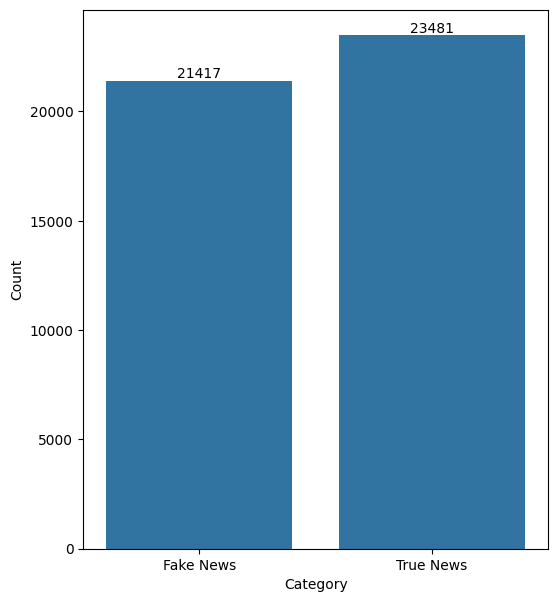

In [28]:
# jumlah label true & fake
plt.figure(figsize=(6, 7))
ax = sns.countplot(x='category', data=dataset2)
plt.xlabel('Category')  # Label sumbu x
plt.ylabel('Count')     # Label sumbu y

# Mengganti label sumbu x
ax.set_xticklabels(['Fake News', 'True News'])

# Menambahkan teks jumlah data di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
dataset2.isna().sum() #check null

index       0
title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [ ]:
#check jika ada empty string
blank = []

for index, text in dataset2["text"].items():
    if text.isspace(): # jika string kosong
        blank.append(index) # simpan index

len(blank)
blank

[8970,
 32340,
 32458,
 32607,
 32642,
 32653,
 32658,
 32664,
 32666,
 32684,
 32685,
 32700,
 32701,
 32702,
 32706,
 32707,
 32709,
 32712,
 32713,
 32718,
 32720,
 32721,
 32722,
 32726,
 32731,
 32734,
 32736,
 32739,
 32747,
 32751,
 32752,
 32757,
 32760,
 32765,
 32768,
 32769,
 32774,
 32788,
 32790,
 32791,
 32799,
 32814,
 32819,
 32820,
 32826,
 32827,
 32829,
 32832,
 32836,
 32838,
 32844,
 32848,
 32849,
 32857,
 32865,
 32867,
 32870,
 32879,
 32881,
 32882,
 32889,
 32890,
 32892,
 32895,
 32906,
 32908,
 32910,
 32911,
 32918,
 32922,
 32924,
 32937,
 32948,
 32949,
 32950,
 32955,
 32959,
 32964,
 32966,
 32968,
 32976,
 32980,
 32998,
 33002,
 33006,
 33007,
 33031,
 33041,
 33042,
 33044,
 33048,
 33053,
 33054,
 33060,
 33067,
 33075,
 33078,
 33089,
 33096,
 33098,
 33101,
 33103,
 33105,
 33109,
 33125,
 33135,
 33146,
 33156,
 33170,
 33182,
 33185,
 33194,
 33199,
 33203,
 33205,
 33209,
 33210,
 33220,
 33223,
 33230,
 33238,
 33248,
 33249,
 33258,
 33261,
 

### Pre-Processing ###

In [ ]:
# 1. menghapus fitur yang tidak perlu
dataset2 = dataset2[['text', 'category']]
dataset2.head()

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [ ]:
# 2. menghapus kolom yang kosong
# cek jumlah kolom sebelum di hapus
print("sebelum : ")
print(dataset2.shape)
# menghapus kolom yang kosong
dataset2.drop(blank, inplace=True)
print()
# cek setalah di hapus
print("sesudah : ")
print(dataset2.shape)

sebelum : 
(44898, 2)

sesudah : 
(44267, 2)


In [ ]:
dataset2['text'] = dataset2['text'].apply(clean_text)

In [ ]:
dataset2

,text,category
0,washington reuters head conservative republica...,1
1,washington reuters transgender people allowed ...,1
2,washington reuters special counsel investigati...,1
3,washington reuters trump campaign adviser geor...,1
4,seattle washington reuters president donald tr...,1
...,...,...
44893,21st century wire say 21wire reported earlier ...,0
44894,21st century wire say familiar theme dispute c...,0
44895,patrick henningsen 21st century wireremember o...,0
44896,21st century wire say al jazeera america histo...,0


### Train ###

In [ ]:
X_train, X_test, y_train, y_test = splitting(dataset2)

X_train2, X_test2, y_train2, y_test2 = splitting(dataset2)

In [ ]:
# Memasukkan data kedalam list agar mudah melakukan cross validation
X.append([X_train, X_test])
Y.append([y_train, y_test])

In [ ]:
# model2 = trainDataset(X_train, y_train)
# joblib.dump(model1, 'model_dataset2.pkl')

# load model
model2 = joblib.load('model_dataset2.pkl')

### Predict ###

In [ ]:
predictions = model2.predict(X_test)

### Evaluasi ###

In [ ]:
# Step 5: Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[6778   52]
 [  21 6430]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6830
           1       0.99      1.00      0.99      6451

    accuracy                           0.99     13281
   macro avg       0.99      0.99      0.99     13281
weighted avg       0.99      0.99      0.99     13281



In [ ]:
print(metrics.accuracy_score(y_test, predictions)*100,"%")

99.45034259468414 %


In [ ]:
# text = "Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images."
text = "WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that support education, scientific research, infrastructure, public health and environmental protection. â€œThe (Trump) administration has already been willing to say: â€˜Weâ€™re going to increase non-defense discretionary spending ... by about 7 percent,â€™â€ Meadows, chairman of the small but influential House Freedom Caucus, said on the program. â€œNow, Democrats are saying thatâ€™s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I donâ€™t see where the rationale is. ... Eventually you run out of other peopleâ€™s money,â€ he said. Meadows was among Republicans who voted in late December for their partyâ€™s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. â€œItâ€™s interesting to hear Mark talk about fiscal responsibility,â€ Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. â€œThis is one of the least ... fiscally responsible bills weâ€™ve ever seen passed in the history of the House of Representatives. I think weâ€™re going to be paying for this for many, many years to come,â€ Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or â€œentitlement reform,â€ as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, â€œentitlementâ€ programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryanâ€™s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the â€œDreamers,â€ people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. â€œWe need to do DACA clean,â€ she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. "
# text = clean_text(text)
text = [text]

In [ ]:
predictions = model2.predict(text)
print(predictions)

['1']


## dataset3 ##

In [29]:
dataset3.head()

,index,title,text,subject,date,category
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [30]:
#subjek apa saja yang ada di dalam dataset
dataset3['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

C:\Users\MSI\AppData\Local\Temp\ipykernel_21060\3641352468.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Fake News', 'True News'])


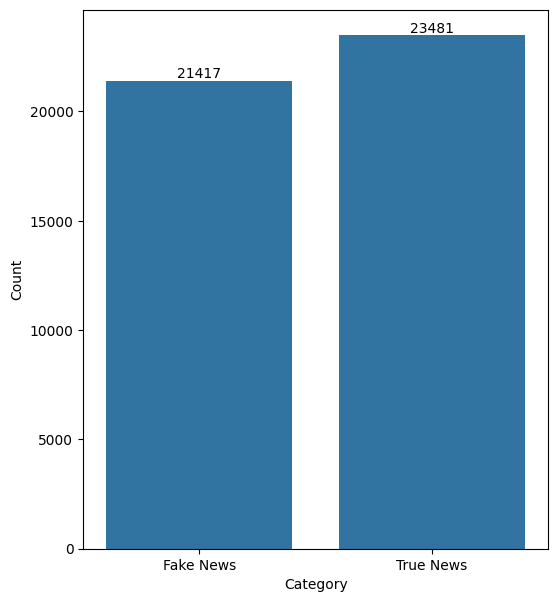

In [31]:
# jumlah label true & fake
plt.figure(figsize=(6, 7))
ax = sns.countplot(x='category', data=dataset3)
plt.xlabel('Category')  # Label sumbu x
plt.ylabel('Count')     # Label sumbu y

# Mengganti label sumbu x
ax.set_xticklabels(['Fake News', 'True News'])

# Menambahkan teks jumlah data di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
dataset3.isna().sum() #check null

index       0
title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [ ]:
#check jika ada empty string
blank = []

for index, text in dataset3["text"].items():
    if text.isspace(): # jika string kosong
        blank.append(index) # simpan index

len(blank)
blank

[8970,
 32340,
 32458,
 32607,
 32642,
 32653,
 32658,
 32664,
 32666,
 32684,
 32685,
 32700,
 32701,
 32702,
 32706,
 32707,
 32709,
 32712,
 32713,
 32718,
 32720,
 32721,
 32722,
 32726,
 32731,
 32734,
 32736,
 32739,
 32747,
 32751,
 32752,
 32757,
 32760,
 32765,
 32768,
 32769,
 32774,
 32788,
 32790,
 32791,
 32799,
 32814,
 32819,
 32820,
 32826,
 32827,
 32829,
 32832,
 32836,
 32838,
 32844,
 32848,
 32849,
 32857,
 32865,
 32867,
 32870,
 32879,
 32881,
 32882,
 32889,
 32890,
 32892,
 32895,
 32906,
 32908,
 32910,
 32911,
 32918,
 32922,
 32924,
 32937,
 32948,
 32949,
 32950,
 32955,
 32959,
 32964,
 32966,
 32968,
 32976,
 32980,
 32998,
 33002,
 33006,
 33007,
 33031,
 33041,
 33042,
 33044,
 33048,
 33053,
 33054,
 33060,
 33067,
 33075,
 33078,
 33089,
 33096,
 33098,
 33101,
 33103,
 33105,
 33109,
 33125,
 33135,
 33146,
 33156,
 33170,
 33182,
 33185,
 33194,
 33199,
 33203,
 33205,
 33209,
 33210,
 33220,
 33223,
 33230,
 33238,
 33248,
 33249,
 33258,
 33261,
 

### Pre-Processing ###

In [ ]:
# 1. menghapus fitur yang tidak perlu
dataset3 = dataset3[['text', 'category']]
dataset3.head()

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [ ]:
# 2. menghapus kolom yang kosong
# cek jumlah kolom sebelum di hapus
print("sebelum : ")
print(dataset3.shape)
# menghapus kolom yang kosong
dataset3.drop(blank, inplace=True)
print()
# cek setalah di hapus
print("sesudah : ")
print(dataset3.shape)

sebelum : 
(44898, 2)

sesudah : 
(44267, 2)


In [ ]:
dataset3['text'] = dataset3['text'].apply(clean_text)

In [ ]:
dataset3

,text,category
0,washington reuters head conservative republica...,1
1,washington reuters transgender people allowed ...,1
2,washington reuters special counsel investigati...,1
3,washington reuters trump campaign adviser geor...,1
4,seattle washington reuters president donald tr...,1
...,...,...
44893,21st century wire say 21wire reported earlier ...,0
44894,21st century wire say familiar theme dispute c...,0
44895,patrick henningsen 21st century wireremember o...,0
44896,21st century wire say al jazeera america histo...,0


### Train ###

In [ ]:
X_train, X_test, y_train, y_test = splitting(dataset3)

X_train3, X_test3, y_train3, y_test3 = splitting(dataset3)

In [ ]:
# Memasukkan data kedalam list agar mudah melakukan cross validation
X.append([X_train, X_test])
Y.append([y_train, y_test])

In [ ]:
# model3 = trainDataset(X_train, y_train)
# joblib.dump(model3, 'model_dataset3.pkl')

# load model
model3 = joblib.load('model_dataset3.pkl')

### Predict ###

In [ ]:
predictions = model3.predict(X_test)

### Evaluasi ###

In [ ]:
# Step 5: Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[6777   53]
 [  15 6436]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6830
           1       0.99      1.00      0.99      6451

    accuracy                           0.99     13281
   macro avg       0.99      0.99      0.99     13281
weighted avg       0.99      0.99      0.99     13281



In [ ]:
print(metrics.accuracy_score(y_test, predictions)*100,"%")

99.48799036217152 %


In [ ]:
# text = "Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images."
text = "WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that support education, scientific research, infrastructure, public health and environmental protection. â€œThe (Trump) administration has already been willing to say: â€˜Weâ€™re going to increase non-defense discretionary spending ... by about 7 percent,â€™â€ Meadows, chairman of the small but influential House Freedom Caucus, said on the program. â€œNow, Democrats are saying thatâ€™s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I donâ€™t see where the rationale is. ... Eventually you run out of other peopleâ€™s money,â€ he said. Meadows was among Republicans who voted in late December for their partyâ€™s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. â€œItâ€™s interesting to hear Mark talk about fiscal responsibility,â€ Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. â€œThis is one of the least ... fiscally responsible bills weâ€™ve ever seen passed in the history of the House of Representatives. I think weâ€™re going to be paying for this for many, many years to come,â€ Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or â€œentitlement reform,â€ as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, â€œentitlementâ€ programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryanâ€™s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the â€œDreamers,â€ people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. â€œWe need to do DACA clean,â€ she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. "
# text = clean_text(text)
text = [text]

In [ ]:
predictions = model3.predict(text)
print(predictions)

['1']


## dataset4 ##

In [14]:
dataset4.head()

,News_Headline,Link_Of_News,Source,Stated_On,Date,category,text
0,Says Osama bin Laden endorsed Joe Biden,https://www.politifact.com/factchecks/2020/jun...,Donald Trump Jr.,"June 18, 2020","June 19, 2020",False,The al Qaeda terrorist leader didn’t endorse B...
1,CNN aired a video of a toddler running away fr...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 18, 2020","June 19, 2020",pants-fire,"Twitter marked Trump’s tweet with a ""manipulat..."
2,Says Tim Tebow “kneeled in protest of abortion...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 12, 2020","June 19, 2020",False,"No media reports, or video or photo evidence e..."
3,“Even so-called moderate Democrats like Joe Bi...,https://www.politifact.com/factchecks/2020/jun...,Paul Junge,"June 10, 2020","June 19, 2020",barely-true,Paul Junge — one of several Republican candida...
4,"""Our health department, our city and our count...",https://www.politifact.com/factchecks/2020/jun...,Jeanette Kowalik,"June 14, 2020","June 18, 2020",True,"The death of George Floyd, a Black man, at the..."


In [ ]:
# extrak text dari url
# dataset4['text'] = dataset4['Link_Of_News'].apply(extract_text_from_url)
# dataset4.head()

In [15]:
# menghapus label yang bernama "pants-fire" & merubah category selain False menjadi 1
# merupakan guideline dari publisher untuk melakukan binary classification
dataset4 = dataset4[dataset4['category'] != 'pants-fire']
dataset4 = dataset4[dataset4['category'] != 'full-flop']
dataset4 = dataset4[dataset4['category'] != 'half-flip']
dataset4 = dataset4[dataset4['category'] != 'no-flip']



# convert category menjadi 1 dan 0
# half-true ke bawah jadiin 0
dataset4['category'] = dataset4['category'].replace({
    'True': 1,
    'mostly-true': 1,
    'half-true': 1,
    'barely-true': 1,
    'False': 0
})

dataset4 = dataset4.rename(columns={'Label': 'category'})

C:\Users\MSI\AppData\Local\Temp\ipykernel_21060\2515600934.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset4['category'] = dataset4['category'].replace({


In [16]:
dataset4.head()
dataset4['text'] = dataset4['text'].astype(str)

C:\Users\MSI\AppData\Local\Temp\ipykernel_21060\3415425369.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Fake News', 'True News'])


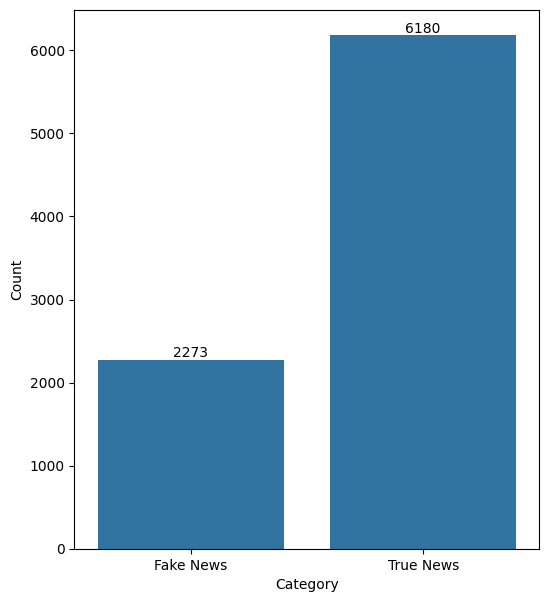

In [34]:
# jumlah label true & fake
plt.figure(figsize=(6, 7))
ax = sns.countplot(x='category', data=dataset4)
plt.xlabel('Category')  # Label sumbu x
plt.ylabel('Count')     # Label sumbu y

# Mengganti label sumbu x
ax.set_xticklabels(['Fake News', 'True News'])

# Menambahkan teks jumlah data di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
dataset4.isna().sum() #check null

News_Headline    0
Link_Of_News     0
Source           0
Stated_On        0
Date             0
category         0
text             0
dtype: int64

In [ ]:
#check jika ada empty string
blank = []

for index, text in dataset4["text"].items():
    if text.isspace(): # jika string kosong
        blank.append(index) # simpan index

len(blank)
blank

[]

### Pre-Processing ###

In [ ]:
# 1. menghapus fitur yang tidak perlu
dataset4 = dataset4[['text', 'category']]
dataset4.head()

,text,category
0,The al Qaeda terrorist leader didn’t endorse B...,0
2,"No media reports, or video or photo evidence e...",0
3,Paul Junge — one of several Republican candida...,1
4,"The death of George Floyd, a Black man, at the...",1
6,The Facebook post also falsely claimed that Ca...,0


In [ ]:
# 2. menghapus kolom yang kosong
# cek jumlah kolom sebelum di hapus
print("sebelum : ")
print(dataset4.shape)
# menghapus kolom yang kosong
dataset4.drop(blank, inplace=True)
print()
# cek setalah di hapus
print("sesudah : ")
print(dataset4.shape)

sebelum : 
(8453, 2)

sesudah : 
(8453, 2)


In [ ]:
dataset4['text'] = dataset4['text'].apply(clean_text)

In [ ]:
dataset4

,text,category
0,al qaeda terrorist leader endorse biden trump ...,0
2,medium report video photo evidence exists tebo...,0
3,paul junge republican candidate looking unseat...,1
4,death george floyd black man hand minneapolis ...,1
6,facebook post falsely claimed california rule ...,0
...,...,...
9954,member democratic state ticket gathered recent...,0
9955,u rep michael mccaul texas warned bad guy hori...,1
9957,race u senate seat vacated retiring saxby cham...,1
9958,sen marco rubio r fla promised kind immigratio...,1


### Train ###

In [ ]:
X_train, X_test, y_train, y_test = splitting(dataset4)

X_train4, X_test4, y_train4, y_test4 = splitting(dataset4)

In [ ]:
# Memasukkan data kedalam list agar mudah melakukan cross validation
X.append([X_train, X_test])
Y.append([y_train, y_test])

In [ ]:
# model4 = trainDataset(X_train, y_train)
# joblib.dump(model4, 'model_dataset4.pkl')

# load model
model4 = joblib.load('model_dataset4.pkl')

### Predict ###

In [ ]:
predictions = model4.predict(X_test)

### Evaluasi ###

In [ ]:
# Step 5: Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 549  134]
 [ 192 1661]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       683
           1       0.93      0.90      0.91      1853

    accuracy                           0.87      2536
   macro avg       0.83      0.85      0.84      2536
weighted avg       0.88      0.87      0.87      2536



In [ ]:
print(metrics.accuracy_score(y_test, predictions)*100,"%")

87.14511041009465 %


In [ ]:
# text = "Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images."
text = "WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that support education, scientific research, infrastructure, public health and environmental protection. â€œThe (Trump) administration has already been willing to say: â€˜Weâ€™re going to increase non-defense discretionary spending ... by about 7 percent,â€™â€ Meadows, chairman of the small but influential House Freedom Caucus, said on the program. â€œNow, Democrats are saying thatâ€™s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I donâ€™t see where the rationale is. ... Eventually you run out of other peopleâ€™s money,â€ he said. Meadows was among Republicans who voted in late December for their partyâ€™s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. â€œItâ€™s interesting to hear Mark talk about fiscal responsibility,â€ Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. â€œThis is one of the least ... fiscally responsible bills weâ€™ve ever seen passed in the history of the House of Representatives. I think weâ€™re going to be paying for this for many, many years to come,â€ Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or â€œentitlement reform,â€ as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, â€œentitlementâ€ programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryanâ€™s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the â€œDreamers,â€ people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. â€œWe need to do DACA clean,â€ she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. "
# text = clean_text(text)
text = [text]

In [ ]:
predictions = model4.predict(text)
print(predictions)

[1]


## dataset5 ##

In [20]:
dataset5['label'] = dataset5['label'].replace({1: 0, 0: 1})
dataset5 = dataset5.rename(columns={'label': 'category'})
dataset5.head()

,Unnamed: 0,title,text,category
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,0
1,1,NaN,Did they post their votes for Hillary already?,0
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",0
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,1
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",0


C:\Users\MSI\AppData\Local\Temp\ipykernel_21060\1016598501.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Fake News', 'True News'])


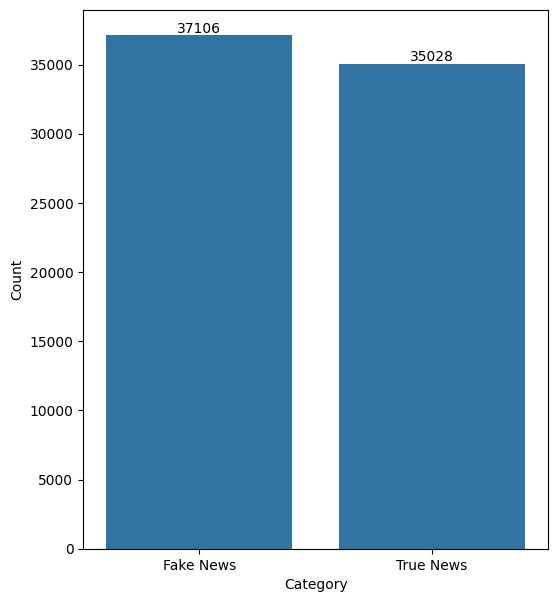

In [33]:
# jumlah label true & fake
plt.figure(figsize=(6, 7))
ax = sns.countplot(x='category', data=dataset5)
plt.xlabel('Category')  # Label sumbu x
plt.ylabel('Count')     # Label sumbu y

# Mengganti label sumbu x
ax.set_xticklabels(['Fake News', 'True News'])

# Menambahkan teks jumlah data di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
dataset5.isna().sum() #check null

Unnamed: 0      0
title         558
text           39
category        0
dtype: int64

In [ ]:
dataset5.info() #check type data
dataset5['text'] = dataset5['text'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   category    72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
null_counts = dataset5.isnull().sum()
print(null_counts)

Unnamed: 0      0
title         558
text            0
category        0
dtype: int64


In [ ]:
#check jika ada empty string
blank = []

for index, text in dataset5["text"].items():
    if text.isspace(): # jika string kosong
        blank.append(index) # simpan index

len(blank)
blank

[7,
 106,
 325,
 364,
 512,
 514,
 555,
 670,
 674,
 676,
 703,
 742,
 1039,
 1096,
 1125,
 1130,
 1242,
 1292,
 1356,
 1392,
 1619,
 1942,
 2248,
 2329,
 2333,
 2509,
 2673,
 2707,
 2778,
 2789,
 2839,
 2894,
 2909,
 3260,
 3312,
 3643,
 3745,
 3968,
 4030,
 4102,
 4103,
 4232,
 4233,
 4271,
 4310,
 4329,
 4349,
 4356,
 4395,
 4400,
 4439,
 4546,
 4676,
 4773,
 4787,
 4846,
 4893,
 4909,
 5209,
 5295,
 5452,
 5588,
 5673,
 5754,
 5789,
 5791,
 5984,
 6093,
 6237,
 6265,
 6446,
 6506,
 6560,
 6587,
 6632,
 6639,
 6840,
 6998,
 7252,
 7257,
 7277,
 7348,
 7460,
 7470,
 7810,
 7890,
 7963,
 8021,
 8045,
 8091,
 8231,
 8273,
 8300,
 8422,
 8444,
 8480,
 8630,
 8639,
 8678,
 8700,
 8871,
 8903,
 9012,
 9022,
 9306,
 9370,
 9455,
 9577,
 9737,
 9840,
 9866,
 10278,
 10295,
 10632,
 10710,
 10716,
 10829,
 10962,
 10971,
 10988,
 11061,
 11377,
 11641,
 11715,
 11802,
 11812,
 11832,
 11964,
 12072,
 12111,
 12147,
 12163,
 12466,
 12772,
 12833,
 12888,
 12964,
 13012,
 13065,
 13178,
 1335

### Pre-Processing ###

In [ ]:
# 1. menghapus fitur yang tidak perlu
dataset5 = dataset5[['text', 'category']]
dataset5['category'] = dataset5['category'].replace({0: '0', 1: '1'})
dataset5.head()

,text,category
0,No comment is expected from Barack Obama Membe...,0
1,Did they post their votes for Hillary already?,0
2,"Now, most of the demonstrators gathered last ...",0
3,A dozen politically active pastors came here f...,1
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",0


In [ ]:
# 2. menghapus kolom yang kosong
# cek jumlah kolom sebelum di hapus
print("sebelum : ")
print(dataset5.shape)
# menghapus kolom yang kosong
dataset5.drop(blank, inplace=True)
print()
# cek setalah di hapus
print("sesudah : ")
print(dataset5.shape)

sebelum : 
(72134, 2)

sesudah : 
(71390, 2)


In [ ]:
dataset5['text'] = dataset5['text'].apply(clean_text)

In [ ]:
dataset5

,text,category
0,comment expected barack obama member fyf911 fu...,0
1,post vote hillary,0
2,demonstrator gathered night exercising constit...,0
3,dozen politically active pastor came private d...,1
4,r 28 sarmat missile dubbed satan 2 replace s 1...,0
...,...,...
72129,washington reuters hacker believed working rus...,1
72130,know fantasyland republican questioned citizen...,0
72131,migrant refuse leave train refugee camp hungar...,1
72132,mexico city reuters donald trump combative sty...,1


C:\Users\MSI\AppData\Local\Temp\ipykernel_21060\1016598501.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Fake News', 'True News'])


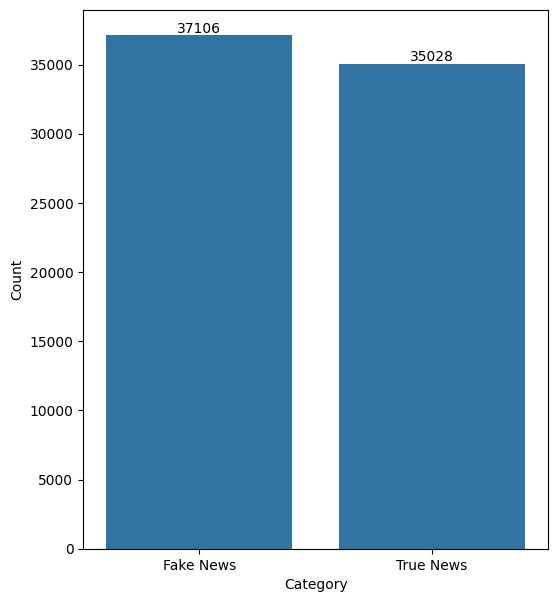

In [32]:
# jumlah label true & fake
plt.figure(figsize=(6, 7))
ax = sns.countplot(x='category', data=dataset5)
plt.xlabel('Category')  # Label sumbu x
plt.ylabel('Count')     # Label sumbu y

# Mengganti label sumbu x
ax.set_xticklabels(['Fake News', 'True News'])

# Menambahkan teks jumlah data di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

### Train ###

In [ ]:
X_train, X_test, y_train, y_test = splitting(dataset5)

X_train5, X_test5, y_train5, y_test5 = splitting(dataset5)

In [ ]:
# Memasukkan data kedalam list agar mudah melakukan cross validation
X.append([X_train, X_test])
Y.append([y_train, y_test])

In [ ]:
# model5 = trainDataset(X_train, y_train)
# joblib.dump(model5, 'model_dataset5.pkl')

# load model
model5 = joblib.load('model_dataset5.pkl')

### Predict ###

In [ ]:
predictions = model5.predict(X_test)

### Evaluasi ###

In [ ]:
# Step 5: Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[10842   146]
 [ 4010  6419]]
              precision    recall  f1-score   support

           0       0.73      0.99      0.84     10988
           1       0.98      0.62      0.76     10429

    accuracy                           0.81     21417
   macro avg       0.85      0.80      0.80     21417
weighted avg       0.85      0.81      0.80     21417



In [ ]:
print(metrics.accuracy_score(y_test, predictions)*100,"%")

80.59485455479292 %


In [ ]:
# text = "Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images."
text = "WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that support education, scientific research, infrastructure, public health and environmental protection. â€œThe (Trump) administration has already been willing to say: â€˜Weâ€™re going to increase non-defense discretionary spending ... by about 7 percent,â€™â€ Meadows, chairman of the small but influential House Freedom Caucus, said on the program. â€œNow, Democrats are saying thatâ€™s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I donâ€™t see where the rationale is. ... Eventually you run out of other peopleâ€™s money,â€ he said. Meadows was among Republicans who voted in late December for their partyâ€™s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. â€œItâ€™s interesting to hear Mark talk about fiscal responsibility,â€ Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. â€œThis is one of the least ... fiscally responsible bills weâ€™ve ever seen passed in the history of the House of Representatives. I think weâ€™re going to be paying for this for many, many years to come,â€ Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or â€œentitlement reform,â€ as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, â€œentitlementâ€ programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryanâ€™s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the â€œDreamers,â€ people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. â€œWe need to do DACA clean,â€ she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. "
# text = clean_text(text)
text = [text]

In [ ]:
predictions = model5.predict(text)
print(predictions)

['1']


## dataset7 ##

In [36]:
dataset7train = dataset7train.rename(columns={'label': 'category'})
dataset7eval = dataset7eval.rename(columns={'label': 'category'})
dataset7 = pd.concat([dataset7train, dataset7eval], ignore_index=True)
dataset7.head()

,Unnamed: 0,title,text,category
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0


C:\Users\MSI\AppData\Local\Temp\ipykernel_21060\225602947.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Fake News', 'True News'])


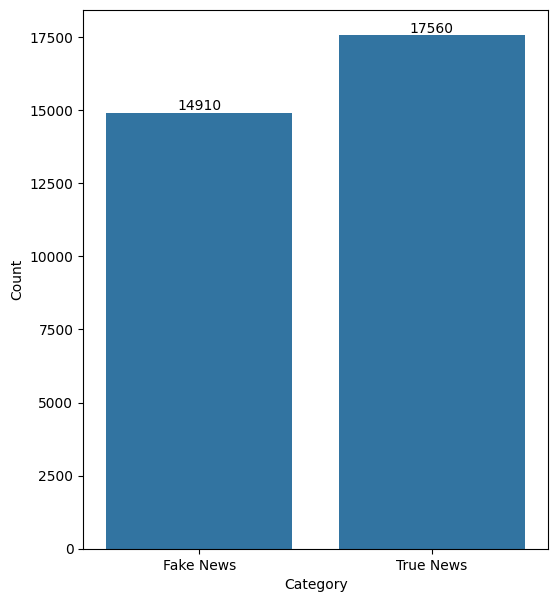

In [37]:
# jumlah label true & fake
plt.figure(figsize=(6, 7))
ax = sns.countplot(x='category', data=dataset7)
plt.xlabel('Category')  # Label sumbu x
plt.ylabel('Count')     # Label sumbu y

# Mengganti label sumbu x
ax.set_xticklabels(['Fake News', 'True News'])

# Menambahkan teks jumlah data di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
dataset7.isna().sum() #check null

Unnamed: 0    0
title         0
text          0
category      0
dtype: int64

In [ ]:
#check jika ada empty string
blank = []

for index, text in dataset7["text"].items():
    if text.isspace(): # jika string kosong
        blank.append(index) # simpan index

len(blank)
blank

[13608, 30615]

### Pre-Processing ###

In [ ]:
# 1. menghapus fitur yang tidak perlu
dataset7 = dataset7[['text', 'category']]
dataset7.head()

,text,category
0,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,While the controversy over Trump s personal ta...,0
3,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,There has never been a more UNCOURAGEOUS perso...,0


In [ ]:
# 2. menghapus kolom yang kosong
# cek jumlah kolom sebelum di hapus
print("sebelum : ")
print(dataset7.shape)
# menghapus kolom yang kosong
dataset7.drop(blank, inplace=True)
print()
# cek setalah di hapus
print("sesudah : ")
print(dataset7.shape)

sebelum : 
(32470, 2)

sesudah : 
(32468, 2)


In [ ]:
dataset7['text'] = dataset7['text'].apply(clean_text)

In [ ]:
dataset7

,text,category
0,ramallah west bank reuters palestinian switche...,1
1,beijing reuters u president elect donald trump...,1
2,controversy trump personal tax return continue...,0
3,beijing reuters trip beijing week zimbabwe mil...,1
4,uncourageous person white house barack obama f...,0
...,...,...
32465,like donald trump sean hannity thin skin throw...,0
32466,asst fbi director james kallstrom spoke stuart...,0
32467,donald trump declared medium enemy john mccain...,0
32468,beirut reuters deir al zor military airport ea...,1


### Train ###

In [ ]:
X_train, X_test, y_train, y_test = splitting(dataset7)

X_train7, X_test7, y_train7, y_test7 = splitting(dataset7)

In [ ]:
# Memasukkan data kedalam list agar mudah melakukan cross validation
X.append([X_train, X_test])
Y.append([y_train, y_test])

In [ ]:
# model7 = trainDataset(X_train, y_train)
# joblib.dump(model7, 'model_dataset7.pkl')

# load model
model7 = joblib.load('model_dataset7.pkl')

### Predict ###

In [ ]:
predictions = model7.predict(X_test)

### Evaluasi ###

In [ ]:
# Step 5: Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[4470   43]
 [ 135 5093]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4513
           1       0.99      0.97      0.98      5228

    accuracy                           0.98      9741
   macro avg       0.98      0.98      0.98      9741
weighted avg       0.98      0.98      0.98      9741



In [ ]:
print(metrics.accuracy_score(y_test, predictions)*100,"%")

98.17267221024537 %


In [ ]:
# text = "Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images."
text = "WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that support education, scientific research, infrastructure, public health and environmental protection. â€œThe (Trump) administration has already been willing to say: â€˜Weâ€™re going to increase non-defense discretionary spending ... by about 7 percent,â€™â€ Meadows, chairman of the small but influential House Freedom Caucus, said on the program. â€œNow, Democrats are saying thatâ€™s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I donâ€™t see where the rationale is. ... Eventually you run out of other peopleâ€™s money,â€ he said. Meadows was among Republicans who voted in late December for their partyâ€™s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. â€œItâ€™s interesting to hear Mark talk about fiscal responsibility,â€ Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. â€œThis is one of the least ... fiscally responsible bills weâ€™ve ever seen passed in the history of the House of Representatives. I think weâ€™re going to be paying for this for many, many years to come,â€ Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or â€œentitlement reform,â€ as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, â€œentitlementâ€ programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryanâ€™s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the â€œDreamers,â€ people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. â€œWe need to do DACA clean,â€ she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. "
# text = clean_text(text)
text = [text]

In [ ]:
predictions = model7.predict(text)
print(predictions)

[1]


## Cross Evaluation ##

### dataset1 vs all ###

In [ ]:
dataset1.head()
dataset1['category'] = dataset1['category'].replace({0: '0', 1: '1'})
X1 = dataset1['text']
Y1 = dataset1['category']

predict = model1.predict(X1)
confusion_matrix(Y1, predict)


array([[22745,   106],
       [   46, 21370]], dtype=int64)

In [ ]:
def confus_matrix(cm):
    # Create a DataFrame for the confusion matrix
    cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    

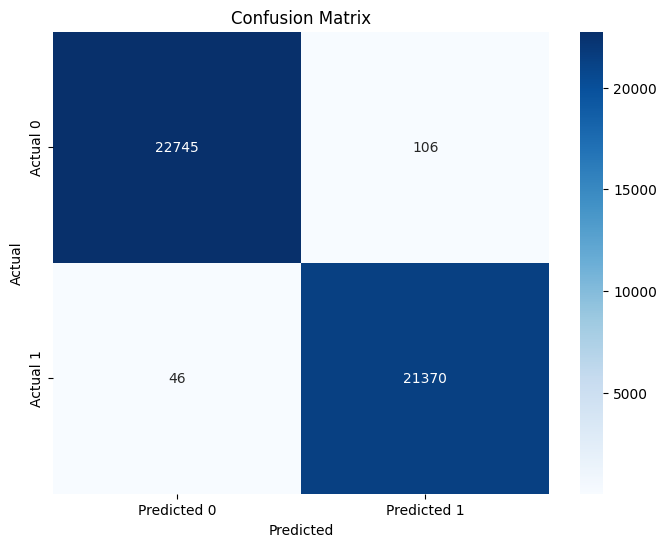

{'0': {'precision': 0.9979816594269668, 'recall': 0.9953612533368342, 'f1-score': 0.9966697340169143, 'support': 22851.0}, '1': {'precision': 0.9950642577761222, 'recall': 0.9978520732162869, 'f1-score': 0.9964562156113028, 'support': 21416.0}, 'accuracy': 0.9965662909164841, 'macro avg': {'precision': 0.9965229586015445, 'recall': 0.9966066632765606, 'f1-score': 0.9965629748141085, 'support': 44267.0}, 'weighted avg': {'precision': 0.9965702451961743, 'recall': 0.9965662909164841, 'f1-score': 0.9965664356191332, 'support': 44267.0}}


In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(Y1, predict)
report = classification_report(Y1, predict, output_dict=True)
sum_report = []
sum_report.append(report)

# Convert the report to a DataFrame
# classification_report_graph(Y1, predict)
confus_matrix(cm)
# sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
print(report)


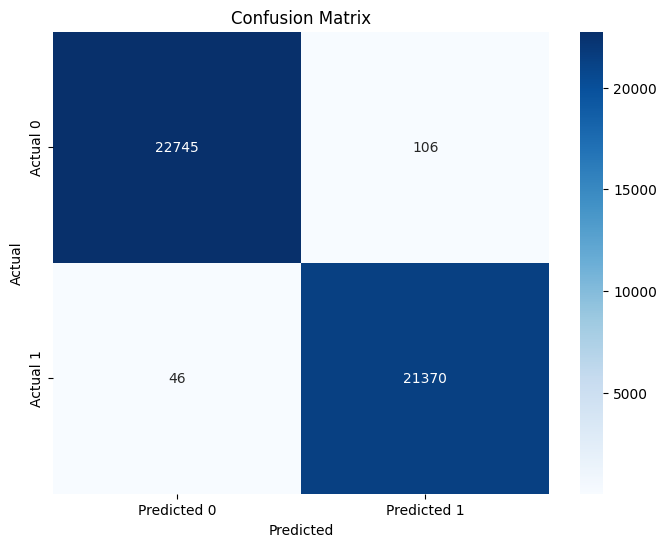

In [ ]:
dataset2.head()
dataset2['category'] = dataset2['category'].replace({0: '0', 1: '1'})
X2 = dataset2['text']
Y2 = dataset2['category']

predict2 = model1.predict(X2)
cm = confusion_matrix(Y2, predict)
report = classification_report(Y2, predict, output_dict=True)
sum_report.append(report)

confus_matrix(cm)

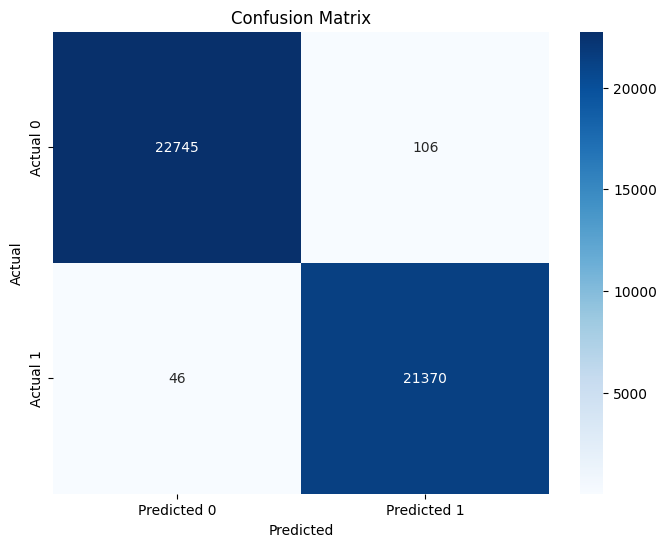

In [ ]:
dataset3.head()
dataset3['category'] = dataset3['category'].replace({0: '0', 1: '1'})
X3 = dataset3['text']
Y3 = dataset3['category']

predict = model1.predict(X3)
cm = confusion_matrix(Y3, predict)
report = classification_report(Y3, predict, output_dict=True)
sum_report.append(report)

confus_matrix(cm)

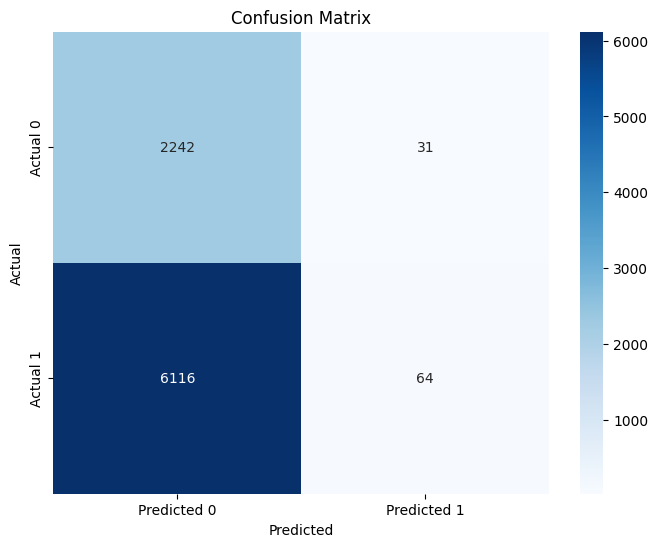

In [ ]:
dataset4.head()
dataset4['category'] = dataset4['category'].replace({0: '0', 1: '1'})
X4 = dataset4['text']
Y4 = dataset4['category']

predict = model1.predict(X4)
cm = confusion_matrix(Y4, predict)
report = classification_report(Y4, predict, output_dict=True)
sum_report.append(report)

confus_matrix(cm)

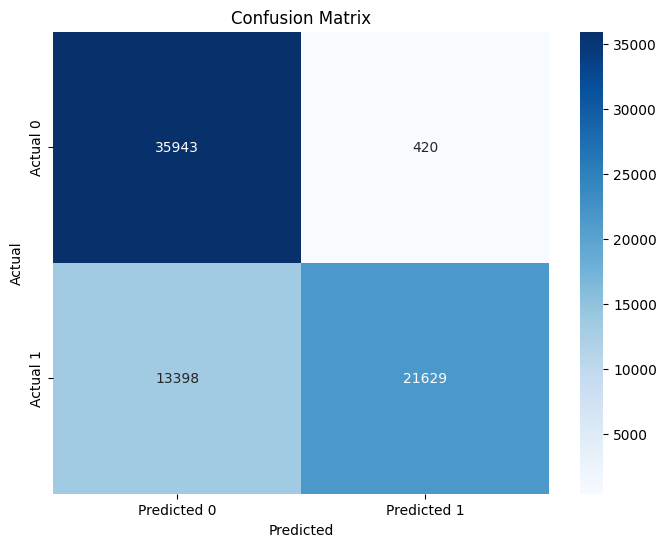

In [ ]:
dataset5.head()
dataset5['category'] = dataset5['category'].replace({0: '0', 1: '1'})
X5 = dataset5['text']
Y5 = dataset5['category']

predict = model1.predict(X5)
cm = confusion_matrix(Y5, predict)
report = classification_report(Y5, predict, output_dict=True)
sum_report.append(report)

confus_matrix(cm)

In [ ]:
# dataset6.head()
# dataset6['category'] = dataset6['category'].replace({0: '0', 1: '1'})
# X6 = dataset6['text']
# Y6 = dataset6['category']

# predict = model1.predict(X6)
# cm = confusion_matrix(Y6, predict)
# report = classification_report(Y6, predict, output_dict=True)
# sum_report.append(report)

# confus_matrix(cm)

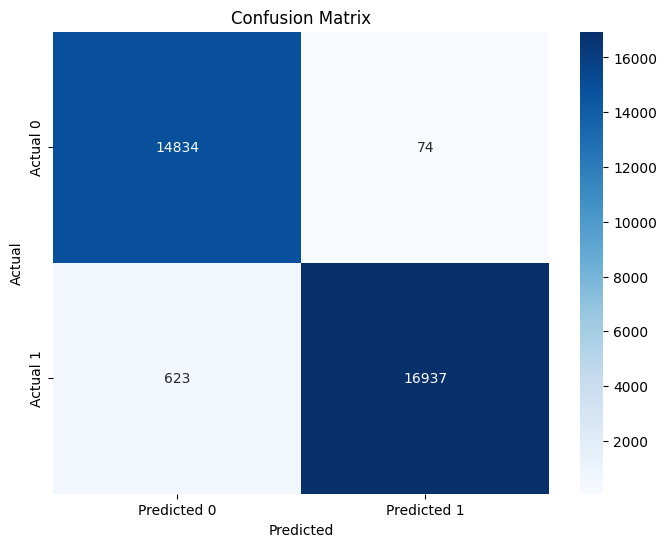

In [ ]:
dataset7.head()
dataset7['category'] = dataset7['category'].replace({0: '0', 1: '1'})
X7 = dataset7['text']
Y7 = dataset7['category']

predict = model1.predict(X7)
cm = confusion_matrix(Y7, predict)
report = classification_report(Y7, predict, output_dict=True)
sum_report.append(report)

confus_matrix(cm)

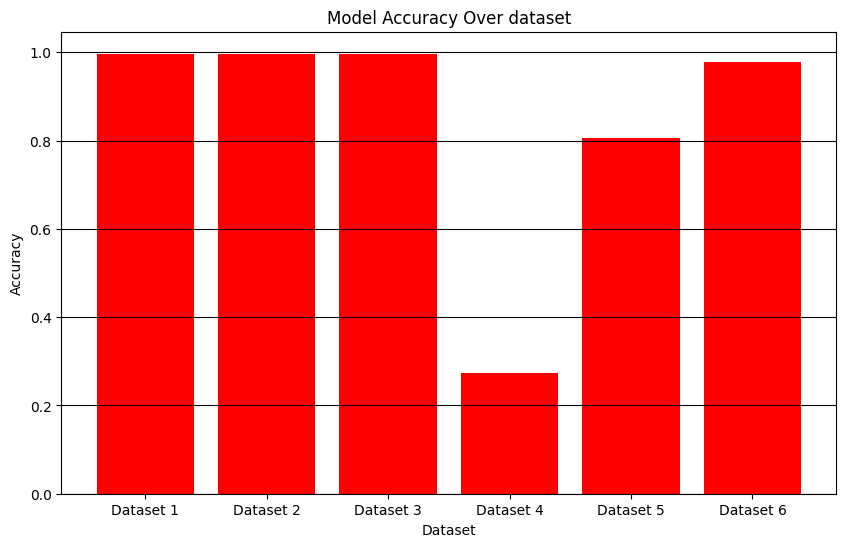

In [ ]:
sum_report[0]['accuracy']
accuracy_values = [report['accuracy'] for report in sum_report]


# Assuming sum_report is your dictionary containing accuracy values
# Example structure of sum_report
# sum_report = [{ 'accuracy': 0.85 }, { 'accuracy': 0.90 }, { 'accuracy': 0.88 }]

# Extract accuracy values
accuracy_values = [report['accuracy'] for report in sum_report]
macro_values = [report['macro avg']['precision'] for report in sum_report]
fake_accuracy = [report['0']['precision'] for report in sum_report]
true_news_accuracy = [report['1']['precision'] for report in sum_report]
weighted_accuracy = [report['weighted avg']['precision'] for report in sum_report]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(accuracy_values)), accuracy_values, color='r')
plt.title('Model Accuracy Over dataset')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.xticks(range(len(accuracy_values)), [f'Dataset {i+1}' for i in range(len(accuracy_values))])
plt.grid(visible=True, axis='y', which='both', color='black')
plt.show()

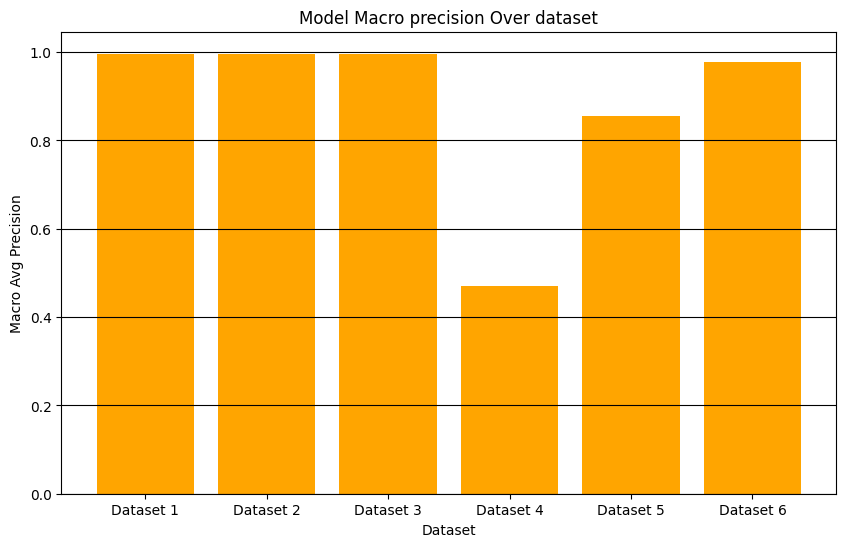

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(macro_values)), macro_values, color='orange')
plt.title('Model Macro precision Over dataset')
plt.xlabel('Dataset')
plt.ylabel('Macro Avg Precision')
plt.xticks(range(len(macro_values)), [f'Dataset {i+1}' for i in range(len(macro_values))])
plt.grid(visible=True, axis='y', which='both', color='black')
plt.show()

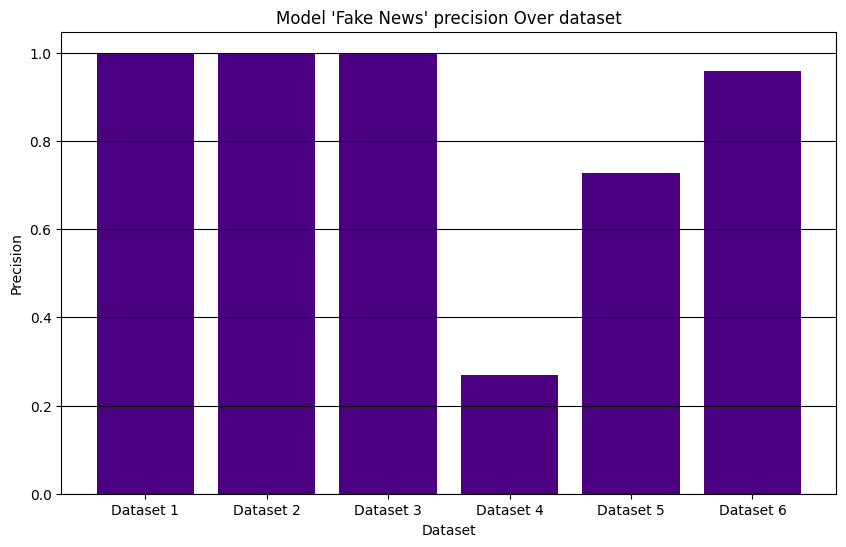

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(fake_accuracy)), fake_accuracy, color='indigo')
plt.title('Model \'Fake News\' precision Over dataset')
plt.xlabel('Dataset')
plt.ylabel('Precision')
plt.xticks(range(len(fake_accuracy)), [f'Dataset {i+1}' for i in range(len(fake_accuracy))])
plt.grid(visible=True, axis='y', which='both', color='black')
plt.show()

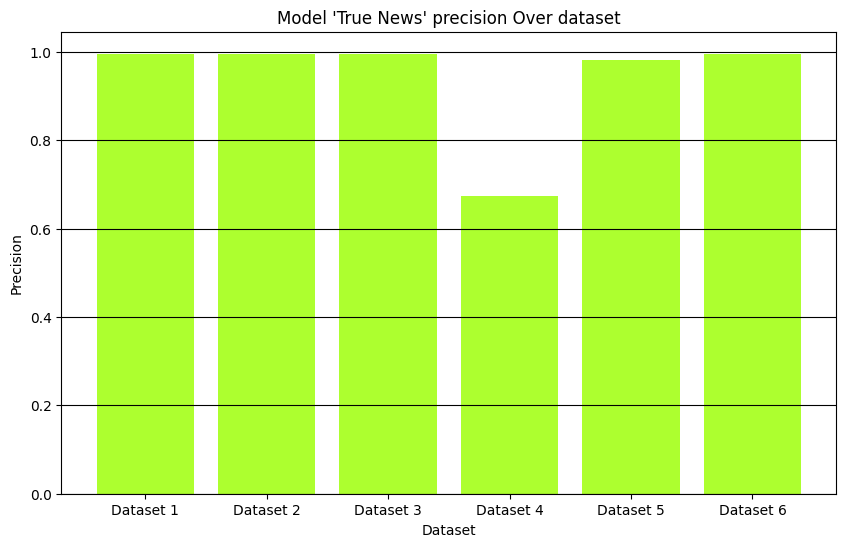

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(true_news_accuracy)), true_news_accuracy, color='greenyellow')
plt.title('Model \'True News\' precision Over dataset')
plt.xlabel('Dataset')
plt.ylabel('Precision')
plt.xticks(range(len(true_news_accuracy)), [f'Dataset {i+1}' for i in range(len(true_news_accuracy))])
plt.grid(visible=True, axis='y', which='both', color='black')
plt.show()

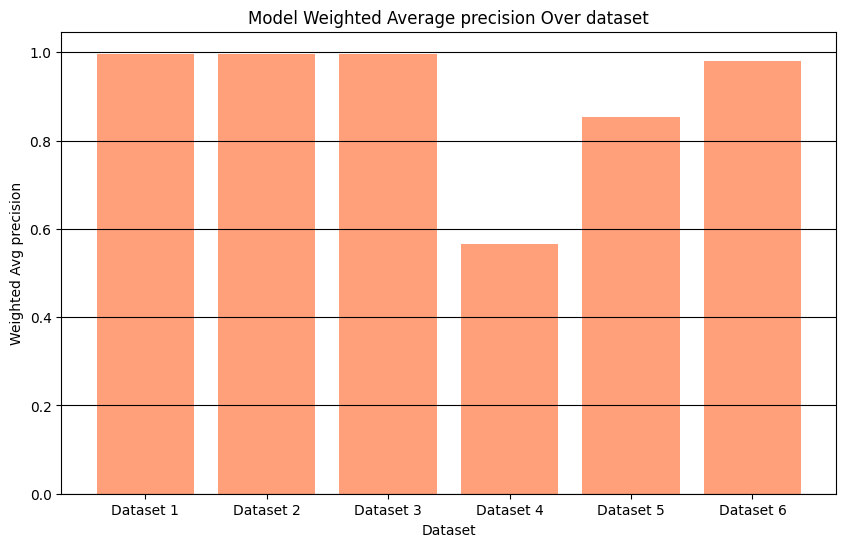

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(weighted_accuracy)), weighted_accuracy, color='lightsalmon')
plt.title('Model Weighted Average precision Over dataset')
plt.xlabel('Dataset')
plt.ylabel('Weighted Avg precision')
plt.xticks(range(len(weighted_accuracy)), [f'Dataset {i+1}' for i in range(len(weighted_accuracy))])
plt.grid(visible=True, axis='y', which='both', color='black')
plt.show()

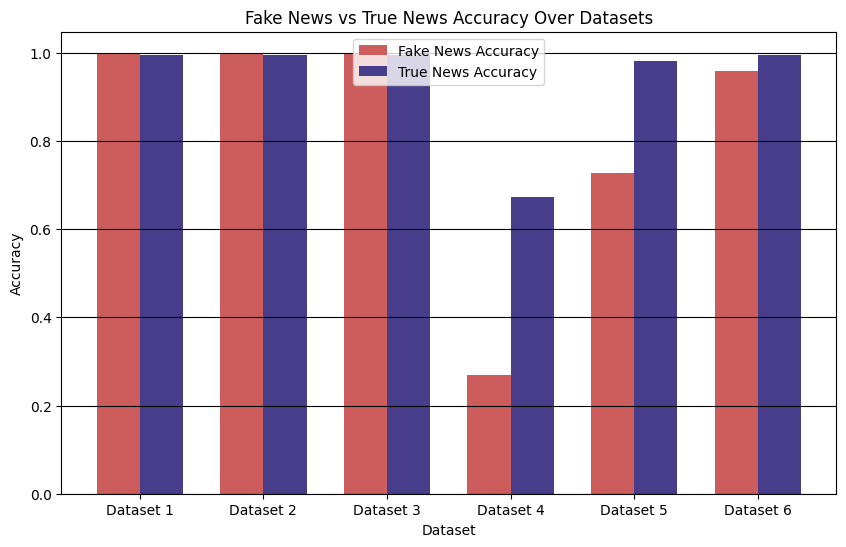

In [ ]:
# Number of datasets
n_datasets = len(accuracy_values)

# Bar width
bar_width = 0.35

# Create a bar chart
plt.figure(figsize=(10, 6))

# Bar positions
index = range(n_datasets)
index_fake = [i - bar_width/2 for i in index]
index_true = [i + bar_width/2 for i in index]

# Plot bars
plt.bar(index_fake, fake_accuracy, width=bar_width, color='indianred', label='Fake News Accuracy')
plt.bar(index_true, true_news_accuracy, width=bar_width, color='darkslateblue', label='True News Accuracy')

# Add titles and labels
plt.title('Fake News vs True News Accuracy Over Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.xticks(index, [f'Dataset {i+1}' for i in range(n_datasets)])
plt.legend()
plt.grid(visible=True, axis='y', which='both', color='black')

# Show plot
plt.show()

In [ ]:
sum_report[0]

{'0': {'precision': 0.9979816594269668,
  'recall': 0.9953612533368342,
  'f1-score': 0.9966697340169143,
  'support': 22851.0},
 '1': {'precision': 0.9950642577761222,
  'recall': 0.9978520732162869,
  'f1-score': 0.9964562156113028,
  'support': 21416.0},
 'accuracy': 0.9965662909164841,
 'macro avg': {'precision': 0.9965229586015445,
  'recall': 0.9966066632765606,
  'f1-score': 0.9965629748141085,
  'support': 44267.0},
 'weighted avg': {'precision': 0.9965702451961743,
  'recall': 0.9965662909164841,
  'f1-score': 0.9965664356191332,
  'support': 44267.0}}

In [ ]:
sum_report[1]

{'0': {'precision': 0.9979816594269668,
  'recall': 0.9953612533368342,
  'f1-score': 0.9966697340169143,
  'support': 22851.0},
 '1': {'precision': 0.9950642577761222,
  'recall': 0.9978520732162869,
  'f1-score': 0.9964562156113028,
  'support': 21416.0},
 'accuracy': 0.9965662909164841,
 'macro avg': {'precision': 0.9965229586015445,
  'recall': 0.9966066632765606,
  'f1-score': 0.9965629748141085,
  'support': 44267.0},
 'weighted avg': {'precision': 0.9965702451961743,
  'recall': 0.9965662909164841,
  'f1-score': 0.9965664356191332,
  'support': 44267.0}}

In [ ]:
sum_report[2]

{'0': {'precision': 0.9979816594269668,
  'recall': 0.9953612533368342,
  'f1-score': 0.9966697340169143,
  'support': 22851.0},
 '1': {'precision': 0.9950642577761222,
  'recall': 0.9978520732162869,
  'f1-score': 0.9964562156113028,
  'support': 21416.0},
 'accuracy': 0.9965662909164841,
 'macro avg': {'precision': 0.9965229586015445,
  'recall': 0.9966066632765606,
  'f1-score': 0.9965629748141085,
  'support': 44267.0},
 'weighted avg': {'precision': 0.9965702451961743,
  'recall': 0.9965662909164841,
  'f1-score': 0.9965664356191332,
  'support': 44267.0}}

In [ ]:
sum_report[3]

{'0': {'precision': 0.2682459918640823,
  'recall': 0.9863616366036075,
  'f1-score': 0.4217853447464961,
  'support': 2273.0},
 '1': {'precision': 0.6736842105263158,
  'recall': 0.010355987055016181,
  'f1-score': 0.020398406374501993,
  'support': 6180.0},
 'accuracy': 0.2728025553058086,
 'macro avg': {'precision': 0.4709651011951991,
  'recall': 0.49835881182931185,
  'f1-score': 0.22109187556049903,
  'support': 8453.0},
 'weighted avg': {'precision': 0.5646624347048019,
  'recall': 0.2728025553058086,
  'f1-score': 0.12833079853344467,
  'support': 8453.0}}

In [ ]:
sum_report[4]

{'0': {'precision': 0.7284611175290326,
  'recall': 0.9884497978714627,
  'f1-score': 0.8387706524782974,
  'support': 36363.0},
 '1': {'precision': 0.9809515170756044,
  'recall': 0.6174950752276815,
  'f1-score': 0.7579017450416988,
  'support': 35027.0},
 'accuracy': 0.8064434794789186,
 'macro avg': {'precision': 0.8547063173023185,
  'recall': 0.8029724365495721,
  'f1-score': 0.7983361987599982,
  'support': 71390.0},
 'weighted avg': {'precision': 0.8523437513001177,
  'recall': 0.8064434794789186,
  'f1-score': 0.7990928933974494,
  'support': 71390.0}}

In [ ]:
sum_report[5]

{'0': {'precision': 0.9596946367341658,
  'recall': 0.9950362221625972,
  'f1-score': 0.9770459410505516,
  'support': 14908.0},
 '1': {'precision': 0.9956498736111927,
  'recall': 0.9645216400911162,
  'f1-score': 0.9798385930404095,
  'support': 17560.0},
 'accuracy': 0.9785327091289885,
 'macro avg': {'precision': 0.9776722551726793,
  'recall': 0.9797789311268568,
  'f1-score': 0.9784422670454807,
  'support': 32468.0},
 'weighted avg': {'precision': 0.9791406746656859,
  'recall': 0.9785327091289885,
  'f1-score': 0.978556319544512,
  'support': 32468.0}}